STEP:1-Import Libraries

In [ ]:
import warnings #ignore warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer     #It is used to extract the features from text.
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score                      #It calculates efficiency for classification technique

STEP:2-A) Loading Dataset

In [ ]:
#USING METHOD-IV FOR LOADING DATA.
#Get/Accessing dataset which is uploaded here manually from outer data source(kaggle)by using Panda library function as it take file as dataframe
#(i.e.2-D array/matrix)which then can be given to the model.
raw_mail_data=pd.read_csv('spam.csv',encoding='latin-1')         #We need to use correct encoding to read the file i.e.encoding="ISO-8859-1"or"latin-1".


STEP:3-A) Data Preprocessing

In [ ]:
#MISSING VALUES IN DATASET:
#While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame which later creates problems while operating that 
#data frame. Pandas isnull() and notnull() methods are used to check and manage NULL values in a data frame.
#Replace null values with null string so that it does not give any error that it doesn't recognize the text.

#So pd.notnull() returns dataset stored in var'raw_mail_data'having boolean values as True if no missing(or no null)values are present and False if missing
#(or null/NaN)values are present.And thus funct .where()is called by var which store dataset in which we have to replace null values and so will take that 
#dataset of boolean values as first argument and replace False (i.e. missing values)places with empty string i.e. " " passed as secong argument and store new 
#dataset formed in var'mail_data'.
#So first argum passed is dataset containing missing values which has to be replaced and second argum is value from which missing values will be replaced.   
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)), '')
print(mail_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...              
1      ham                      Ok lar... Joking wif u oni...              
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...              
3      ham  U dun say so early hor... U c already then say...              
4      ham  Nah I don't think he goes to usf, he lives aro...              
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...              
5568   ham              Will Ì_ b going to esplanade fr home?              
5569   ham  Pity, * was in mood for that. So...any other s...              
5570   ham  The guy did some bitching but I acted like i'd...              
5571   ham                         Rofl. Its true to its name              

     Unnamed: 3 Unnamed: 4  
0                           
1                           


In [ ]:
#EXPLORING FEAURES/COLUMNS OF DATASET:
#To check columns present in dataset .
mail_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#To remove some particular columns from dataset.We give axis keyword value as 1 which represent column as we have given column names to remove not rows.
mail_data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
#Extra Code---mail_data.dropna(axis='columns')
#To check no of rows and column in panda dataframe.
mail_data.shape

(5572, 2)

In [ ]:
#To rename the columns name in dataset.
mail_data.rename({'v1':'Category', 'v2':'Messages'},axis=1,inplace=True)
#To print bydefault first 5 samples of dataset stored in var.
mail_data.head()

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#In Dataset label spam mail as 0; Non-spam mail as 1,so 0 rep spam mail and 1 rep ham mail
#So we change category column values as 0 and 1 by using .loc[]function here to access particular column values but bydefault if we want to do changes to that
#accessed loc it will do changes to whole row containing that col value,so pass second argum which rep that part col in which only we want to do changes. 
mail_data.loc[mail_data['Category']=='spam','Category'] = 0 
mail_data.loc[mail_data['Category']=='ham','Category'] = 1 
mail_data.head()

,Category,Messages
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


STEP:2-B) Preparing Dataset

In [ ]:
#PREPARING DATASET BY DEFINING X AND Y:
#separate the data in X and Y where X represents Messages and Y represents Category.So here,dataset X is actually other/imput var & Y is categorial/out var as 
#ML is done by Classification Technique.
X = mail_data['Messages']     #Store Messages column values of dataset to X var
Y = mail_data['Category']     #Store Category column values to Y var
print(X)
print('.................')
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messages, Length: 5572, dtype: object
.................
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


STEP:3-B) Data Preprocessing

In [ ]:
#SPLITTING DATASET INTO TRAINING AND TESTING DATASETS:
#So it splits 80% of dataset into training dataset and remaining 20% as testing data.And to split dataset same way as before i.e.each time it give same result.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=3)

*Dimensionality Reduction By Using Feature Extraction Model TfidfVectorizer* 

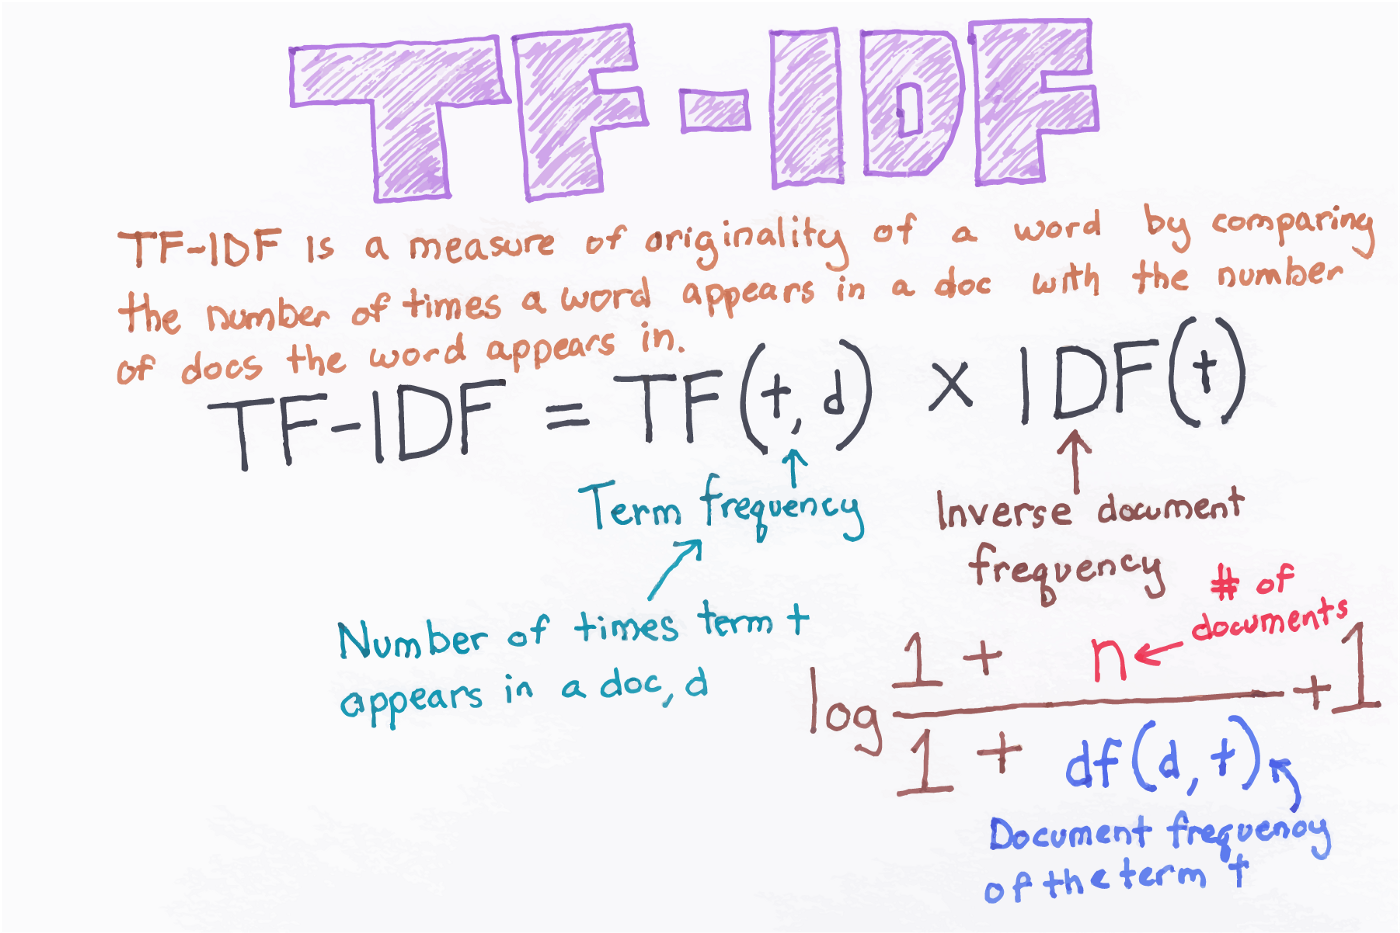




TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency.This is very common algorithm to transform text data into a meaningful representation 
of numbers matrix which is used to train machine algorithm(model) for prediction by using TfidfVectorizer.

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

We are creating index vocabulary(dictionary) of the words of the train documents set.Now,we can convert the test document set into a vector space where each term of vector is indexed as acc to our index vocabulary. Example first term of the vector represents “blue” term of our vocabulary. the second term represents “sun” and so on. Now we are going to use term — frequency which means a measure of how many times the terms t present in our vocabulary in document d is return by tf(t,d). We can define the term-frequency as counting function.

And inverse document frequency is the no of documents where the term t appears and it is calculate by formula gives idf(t).

Then,finally there will be multiplication tf(t,d) with idf(t) i.e term frequency with inverse document frequency.

In [ ]:
#FEATURE EXTRACTION METHOD :
#Feature Extraction means overall summarizing the given dataset either by removing some features or by merging features or by converting them ,so to have only 
#that features which are important and necessary for training model.

#TfidfVectorizer model creates a tf-idf matrix. It is in form of class in library family & so we form object of this class,while doing that we call parametrized 
#constructor defined in class .Further the object can access any function of class like transform() and fit_transform() functions.
#So we pass several arguments in funct,like when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold ,
#(i.e.no of doc value)and value lies between 0 and 1 by using mim_df=noofdoc(here 1).Then to convert the text letters to lower case letters by lowercase=True,
#then terms like“is”, “the”,etc are stop words bydefault & ignored because there are stop words which is repeating frequently and give less information byusing 
#stop_words='english',it is responsible to remove stop words as it has its inbuilt list of standard stopwords and create word vocabulary.
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

# Method fit_transform(text sentences):- Fits or Train the TfIdfVectorizer model with training text dataset and Returns a tf-idr sparse matrix containing tf-idf 
#                            score for tokens(words)in each given sentence i.e.count of tokens.
X_train_features = feature_extraction.fit_transform(X_train)
# Method transform(new text sentences):- Returns a sparse matrix of testing text dataset containing tf-idf score for tokens(words) in each given sentence.
X_test_features = feature_extraction.transform(X_test)
#So both X train and test vars has now numerical data stored in place of text data(i.e.email messages).

#Now,convert Y values into integers as 0 and 1 values can be consider or recognized as numeric strings but we need them as numerical values i.e.integers.
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
#So both Y_train and Y_test vars has now numerical values i.e.integers.


STEP:4- Training the Model--SVM Model

In [ ]:
#Training the SVM model with Training Dataset:
#Support Vector Machine model perform classification technique where it segregates or separates the two classes with each other by linear line such that the 
#two types of data are present in two sides of line and data pts on both sides should have same distance from separator(hyperplane).The more far away data pts
#are, the more accuracy it gives. Here spam mails will be located on one side of hyperplane and ham mail on other side. 

model = LinearSVC()  #Creating object of class LinearSVC calling default constructor.
model.fit(X_train_features,Y_train)  #on calling funct by object,it will train model on the basis of training dataset of X and Y.


LinearSVC()

STEP:5- Testing the Model--SVM Model

In [ ]:
#Testing the SVM model with Training Dataset and Testing Dataset:
#So,now we let model predict the class i.e.Y_train & Y_test values which we already know on the basis of the given messages tf-idf matrix i.e.X_train_features
#and X_test_features values where with first X it has trained with and second X it has never seen before as this dataset is not given to model before but we 
#already know their classes.

#Prediction on Training Data 
Y_train_predict = model.predict(X_train_features)
#Prediction on Testing Data  
Y_test_predict = model.predict(X_test_features)     
print("Predicting Y training dataset:",Y_train_predict)
print("Predicting Y testing dataset:",Y_test_predict)
#It will give Y_train and Y_test values.


Predicting Y training dataset: [1 1 1 ... 1 1 1]
Predicting Y testing dataset: [1 0 1 ... 1 1 1]


STEP:6- Evaluation -- Finding the Efficiency of Model

In [ ]:
#accuracy_score model imported is in form of function which is used to calculate efficiency or accuracy in classification technique for training and testing 
#datasets both.So, by comparing actual values of Y_train and Y_test with predicted values in Y_train_predict and Y_test_predict respectively and the more they
#match with each other, the more will be accuracy score of model.  

#Accuracy of prediction on training X data should be good as it has already seen the data becaz it was trained by this data.
train_accuracy = accuracy_score(Y_train,Y_train_predict)
#Accuracy of prediction on testing X data which it has never seen before becaz it was not given to model before.
test_accuracy = accuracy_score(Y_test,Y_test_predict)
print("Accuracy on training dataset:",train_accuracy)
print("Accuracy on testing dataset:",test_accuracy)


Accuracy on training dataset: 0.9995512676688355
Accuracy on testing dataset: 0.9856502242152466


STEP:7- Actual Working of Model--Prediction for New Mail

In [ ]:
#Now, we give some new mail to model whose class we want to find i.e.we want model to predict whether new mail given to model is spam or ham mail 
input_mail = ["AXIS PNB | Careers Walk-in Interview For Freshers and Experienced"]
#Features Extraction:-Convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)   #It returns the generated tf-idf matrix of text.

#Making prediction of class for this new input mail in vector matrix.
prediction = model.predict(input_mail_features)  #It returns the class of data i.e a list which contains label either 0 or 1 stored in var'prediction'.
print(prediction)
#So if label is 0 then given mail is spam mail and if it 1 then its ham mail.

if (prediction[0]==1):           #If first element(i.e.first indexno 0)of returned list is 1 then it is ham mail 
   print("HAM MAIL")
else:                            #Else first element(i.e.first indexno 0)of returned list is 0 then it is spam mail
   print('SPAM MAIL')   

[1]
HAM MAIL
